In [1]:
import cv2

import numpy as np

from PIL import Image
from utils.keypoint import DetectHandKeypoint
from utils.classifier import Classifier

In [2]:
detector = DetectHandKeypoint()
classifier = Classifier('models/classification.pt')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
# Run keypoint detection
img = cv2.imread('datasets/Gesture/d/d_8.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = detector(img_rgb)
keypoints = detector.get_keypoint_list(results.multi_hand_landmarks[0].landmark)

scaler_minmax_path = 'models/scaler_minmax.npy'
min, max = np.load(scaler_minmax_path)
scaled_keypoints = np.subtract(keypoints, min) / np.subtract(max, min)
scaled_keypoints

/home/we2060/anaconda3/envs/AD/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


array([0.41793316, 0.51367786, 0.31825374, 0.37915703, 0.25237061,
       0.38797039, 0.32487583, 0.37922057, 0.2598793 , 0.40103962,
       0.29632173, 0.54242608, 0.41121965, 0.7031179 , 0.31888164,
       0.53166816, 0.35929225, 0.64566266, 0.33600407, 0.58094885,
       0.39798837, 0.64502566])

In [4]:
prediction = classifier(scaled_keypoints)
prediction

'☝️'

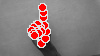

In [5]:
## Visualise Keypoint
img_pred = detector.plot(img, results.multi_hand_landmarks[0])
Image.fromarray(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))